In [1]:
import sys
from os.path import abspath
sys.path.insert(0, abspath('..'))

from os.path import join

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np


import torch
from torchstc.data import load_data
from torchstc.modules import STC
from torchstc.metrics import SpacePlot, Evaluate
from torchstc.utils.cluster import SphericalKmeans

plot = SpacePlot()
eval = Evaluate()

>>>>> /home/godwin/Documents/academic/PPD/torchclust/demos
>>>>> data_loader.py cwd:  /home/godwin/Documents/academic/PPD/torchclust/demos


[nltk_data] Downloading package punkt to /home/godwin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/godwin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
cur = abspath("")
dataset = 'stackoverflow'
data_in_dir=join(cur, "..", "datasets")
dataset_dir=join(data_in_dir, dataset)

### Article model: STC-datstackoverflow-wdeWord2Vec-scaMinMax-tfeSIF-normNone-initKmeans

**Best 3 with Kmeans**

In [3]:
stc_weights=join(data_in_dir, 
                 dataset, 
                 "artefacts",
                 "STC-datstackoverflow-wdeWord2Vec-scaMinMax-tfeSIF-normNone-initKmeans.pth")

In [4]:
x, y = load_data(dataset=dataset_dir, word_emb='Word2Vec', transform='SIF', scaler='MinMax', norm=None)
n_clusters = len(torch.unique(torch.tensor(y)))

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# conversion des données en tenseurs
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

stc = STC(hidden_dims=[torch.Tensor(X_train).shape[-1], 500, 500, 2000, 20], n_clusters=n_clusters)
stc.from_pretrained(stc_weights)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Embedding started...
Word2Vec words embedding loaded...
>>> /home/godwin/Documents/academic/PPD/torchclust/demos/../datasets/stackoverflow/title_StackOverflow.txt <<<<
#### SIF embedding started...
SIF-Embedding 19999 documents with 48-dimensional word vectors...
### SIF embedding completed...
### Embedding completed...
MinMax scaling completed...
No normalization applied...


(torch.Size([18000, 48]),
 torch.Size([2000, 48]),
 torch.Size([18000]),
 torch.Size([2000]))

In [5]:
z3 = stc.autoencoder.encoder(X_train)

In [6]:
# comprehension list with 5 runs of kmeans, get average and std of metrics
avg_w2v_sif_mmx_ikm3 = []
tmp = []
for i in range(5):
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(z3.detach().numpy())
    y_km_pred = kmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_km_pred))

avg_w2v_sif_mmx_ikm3 = np.array(tmp)
np.round(avg_w2v_sif_mmx_ikm3.mean(axis=0), 3) * 100, avg_w2v_sif_mmx_ikm3.std(axis=0)

(array([57.6, 51.2, 40. ]),
 array([4.89897949e-05, 4.89897949e-05, 4.89897949e-05]))

In [7]:
# comprehension list with 5 runs of Sherical kmeans, get average and std of metrics
avg_w2v_sif_mmx_iskm3 = []
tmp = []
for i in range(5):
    skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
    skmeans.fit(z3.detach().numpy())
    y_skm_pred = skmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_skm_pred))

avg_w2v_sif_mmx_iskm3 = np.array(tmp)
np.round(avg_w2v_sif_mmx_iskm3.mean(axis=0), 3) * 100, avg_w2v_sif_mmx_iskm3.std(axis=0)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iter

(array([52.7, 49.8, 38. ]), array([0.0173796 , 0.00584021, 0.00868065]))

In [8]:
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(z3.detach().numpy())
y_km_pred3 = kmeans.labels_


skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
skmeans.fit(z3.detach().numpy())
y_skm_pred3 = skmeans.labels_

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iter

In [9]:
print(min(y_km_pred3), len(np.unique(y_km_pred3)), max(y_km_pred3))
print(min(y_skm_pred3), len(np.unique(y_skm_pred3)), max(y_skm_pred3))

0 20 19
0 20 19


In [10]:
eval.allMetrics(y_train.detach().numpy(), y_km_pred3)

[0.5759, 0.5116, 0.4002]

In [11]:
eval.allMetrics(y_train.detach().numpy(), y_skm_pred3)

[0.5793, 0.5139, 0.4046]

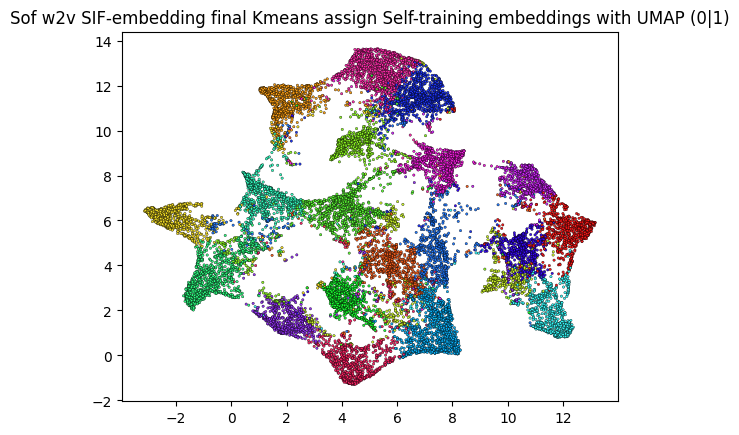

In [12]:
plot.commonSpace_plot(z3.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred3,
                      data_name="Sof w2v SIF-embedding final Kmeans assign", dimred = 'UMAP')

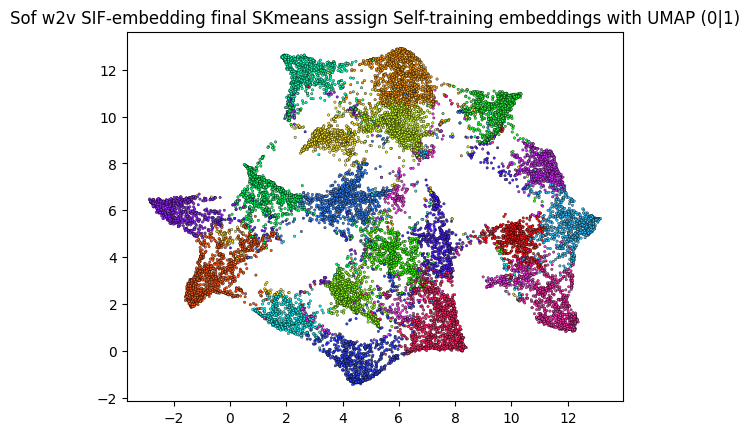

In [13]:
plot.commonSpace_plot(z3.detach().numpy(), comp=[0, 1], tagLabels=y_skm_pred3, 
                      data_name="Sof w2v SIF-embedding final SKmeans assign", dimred = 'UMAP')

### STC-datstackoverflow-wdeWord2Vec-scaNone-tfeSIF-norml2-initKmeans 

**Best 1 with final Kmeans**

**Best 2 with final Spherical**

In [14]:
stc_weights=join(data_in_dir, 
                 dataset, 
                 "artefacts",
                 "STC-datstackoverflow-wdeWord2Vec-scaNone-tfeSIF-norml2-initKmeans.pth")

In [15]:
x, y = load_data(dataset=dataset_dir, word_emb='Word2Vec', transform='SIF', scaler=None, norm='l2')
n_clusters = len(torch.unique(torch.tensor(y)))

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# conversion des données en tenseurs
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

stc = STC(hidden_dims=[torch.Tensor(X_train).shape[-1], 500, 500, 2000, 20], n_clusters=n_clusters)
stc.from_pretrained(stc_weights)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Embedding started...
Word2Vec words embedding loaded...
>>> /home/godwin/Documents/academic/PPD/torchclust/demos/../datasets/stackoverflow/title_StackOverflow.txt <<<<
#### SIF embedding started...
SIF-Embedding 19999 documents with 48-dimensional word vectors...
### SIF embedding completed...
### Embedding completed...
No scaling applied...
l2 normalization completed...


(torch.Size([18000, 48]),
 torch.Size([2000, 48]),
 torch.Size([18000]),
 torch.Size([2000]))

In [16]:
z2 = stc.autoencoder.encoder(X_train)

kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(z2.detach().numpy())
y_km_pred2 = kmeans.labels_


skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
skmeans.fit(z2.detach().numpy())
y_skm_pred2 = skmeans.labels_

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iter

In [17]:
print(min(y_km_pred2), len(np.unique(y_km_pred2)), max(y_km_pred2))
print(min(y_skm_pred2), len(np.unique(y_skm_pred2)), max(y_skm_pred2))

0 20 19
0 20 19


In [18]:
eval.allMetrics(y_train.detach().numpy(), y_km_pred2)

[0.6047, 0.5351, 0.4175]

In [19]:
eval.allMetrics(y_train.detach().numpy(), y_skm_pred2)

[0.6008, 0.54, 0.427]

In [20]:
# comprehension list with 5 runs of kmeans, get average and std of metrics
avg_w2v_sif_nl2_ikm2 = []
tmp = []
for i in range(5):
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(z2.detach().numpy())
    y_km_pred = kmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_km_pred))

avg_w2v_sif_nl2_ikm2 = np.array(tmp)
np.round(avg_w2v_sif_nl2_ikm2.mean(axis=0), 3) * 100, avg_w2v_sif_nl2_ikm2.std(axis=0)

(array([60.5, 53.5, 41.8]), array([0.00051147, 0.00017205, 0.00022804]))

In [21]:
# comprehension list with 5 runs of Sherical kmeans, get average and std of metrics
avg_w2v_sif_nl2_iskm2 = []
tmp = []
for i in range(5):
    skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
    skmeans.fit(z2.detach().numpy())
    y_skm_pred = skmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_skm_pred))

avg_w2v_sif_nl2_iskm2 = np.array(tmp)
np.round(avg_w2v_sif_nl2_iskm2.mean(axis=0), 3) * 100, avg_w2v_sif_nl2_iskm2.std(axis=0)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iter

(array([57. , 52.8, 40.6]), array([0.00877392, 0.00447097, 0.00841204]))

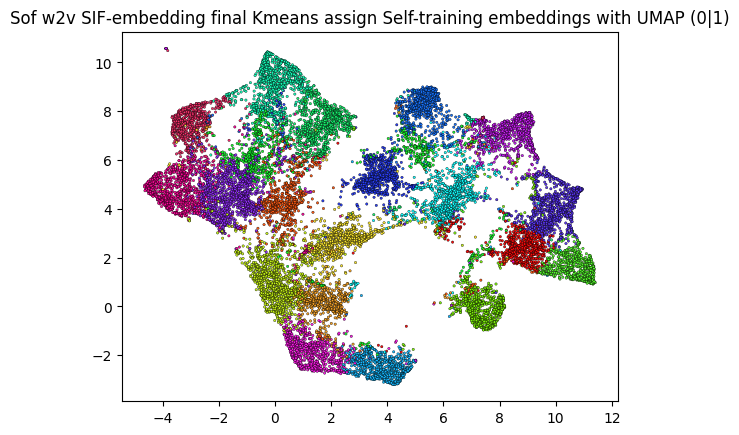

In [22]:
plot.commonSpace_plot(z2.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred2,
                      data_name="Sof w2v SIF-embedding final Kmeans assign", dimred = 'UMAP')

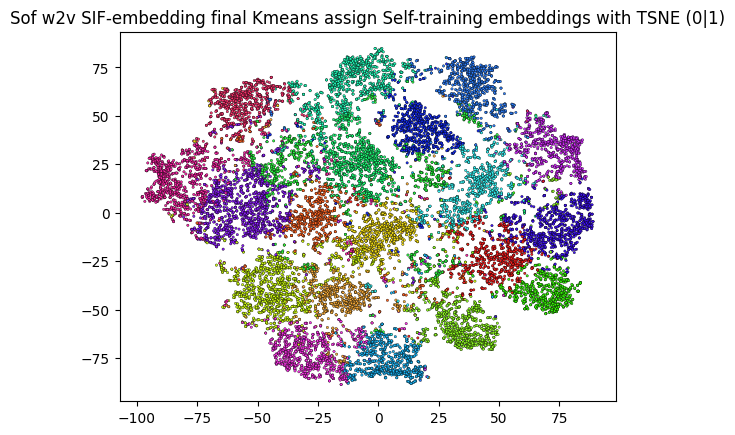

In [23]:
plot.commonSpace_plot(z2.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred2,
                      data_name="Sof w2v SIF-embedding final Kmeans assign", dimred = 'TSNE')

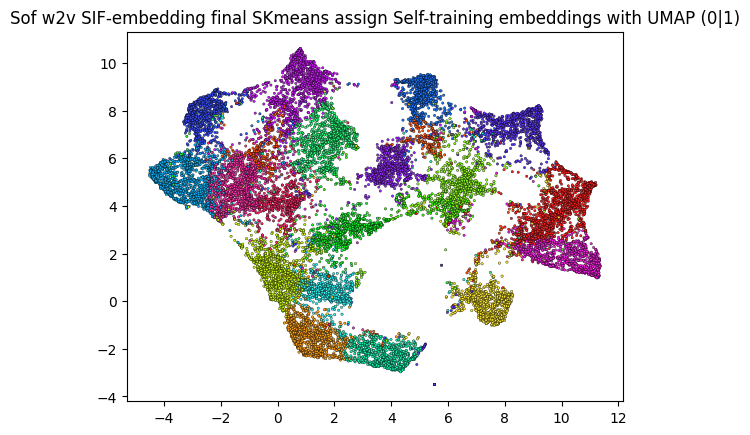

In [24]:
plot.commonSpace_plot(z2.detach().numpy(), comp=[0, 1], tagLabels=y_skm_pred2, 
                      data_name="Sof w2v SIF-embedding final SKmeans assign", dimred = 'UMAP')

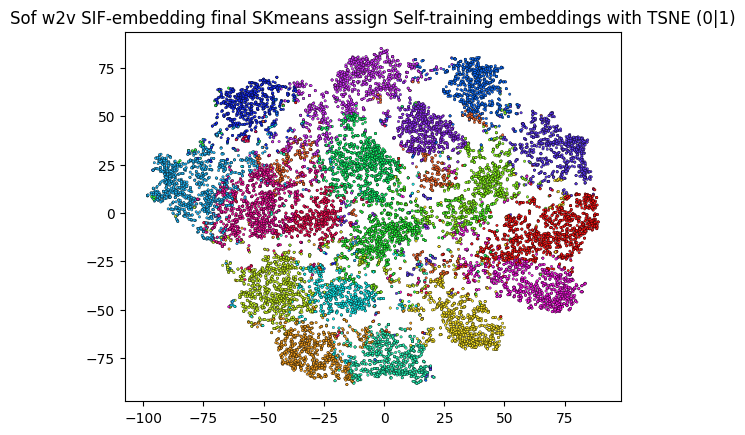

In [25]:
plot.commonSpace_plot(z2.detach().numpy(), comp=[0, 1], tagLabels=y_skm_pred2, 
                      data_name="Sof w2v SIF-embedding final SKmeans assign", dimred = 'TSNE')

### STC-datstackoverflow-wdeWord2Vec-scaMinMax-tfeSIF-norml2-initKmeans

**Best with Kmeans**

In [26]:
stc_weights=join(data_in_dir, 
                 dataset, 
                 "artefacts",
                 "STC-datstackoverflow-wdeWord2Vec-scaMinMax-tfeSIF-norml2-initKmeans.pth")

In [27]:
x, y = load_data(dataset=dataset_dir, word_emb='Word2Vec', transform='SIF', scaler='MinMax', norm='l2')
n_clusters = len(torch.unique(torch.tensor(y)))

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# conversion des données en tenseurs
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

stc = STC(hidden_dims=[torch.Tensor(X_train).shape[-1], 500, 500, 2000, 20], n_clusters=n_clusters)
stc.from_pretrained(stc_weights)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Embedding started...
Word2Vec words embedding loaded...
>>> /home/godwin/Documents/academic/PPD/torchclust/demos/../datasets/stackoverflow/title_StackOverflow.txt <<<<
#### SIF embedding started...
SIF-Embedding 19999 documents with 48-dimensional word vectors...
### SIF embedding completed...
### Embedding completed...
MinMax scaling completed...
l2 normalization completed...


(torch.Size([18000, 48]),
 torch.Size([2000, 48]),
 torch.Size([18000]),
 torch.Size([2000]))

In [28]:
z4 = stc.autoencoder.encoder(X_train)

In [29]:
# comprehension list with 5 runs of kmeans, get average and std of metrics
avg_w2v_sif_mmx_nl2_ikm4 = []
tmp = []
for i in range(5):
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(z4.detach().numpy())
    y_km_pred = kmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_km_pred))

avg_w2v_sif_mmx_nl2_ikm4 = np.array(tmp)
np.round(avg_w2v_sif_mmx_nl2_ikm4.mean(axis=0), 3) * 100, avg_w2v_sif_mmx_nl2_ikm4.std(axis=0)

(array([57.1, 50.1, 36.9]), array([0.00020976, 0.00040792, 0.0003763 ]))

In [30]:
# comprehension list with 5 runs of Sherical kmeans, get average and std of metrics
avg_w2v_sif_mmx_nl2_iskm4 = []
tmp = []
for i in range(5):
    skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
    skmeans.fit(z4.detach().numpy())
    y_skm_pred = skmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_skm_pred))

avg_w2v_sif_mmx_nl2_iskm4 = np.array(tmp)
np.round(avg_w2v_sif_mmx_nl2_iskm4.mean(axis=0), 3) * 100, avg_w2v_sif_mmx_nl2_iskm4.std(axis=0)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iter

(array([53.8, 48.7, 36.5]), array([0.01893955, 0.00886174, 0.01540213]))

In [31]:
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(z4.detach().numpy())
y_km_pred4 = kmeans.labels_


skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
skmeans.fit(z4.detach().numpy())
y_skm_pred4 = skmeans.labels_

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iter

In [32]:
print(min(y_km_pred4), len(np.unique(y_km_pred4)), max(y_km_pred4))
print(min(y_skm_pred4), len(np.unique(y_skm_pred4)), max(y_skm_pred4))

0 20 19
0 20 19


In [33]:
eval.allMetrics(y_train.detach().numpy(), y_km_pred4)

[0.5712, 0.5007, 0.3684]

In [34]:
eval.allMetrics(y_train.detach().numpy(), y_skm_pred4)

[0.5619, 0.4982, 0.3862]

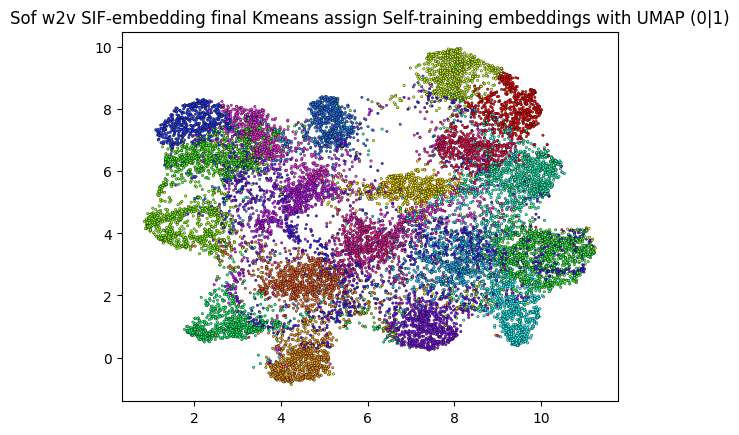

In [35]:
plot.commonSpace_plot(z4.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred4,
                      data_name="Sof w2v SIF-embedding final Kmeans assign", dimred = 'UMAP')

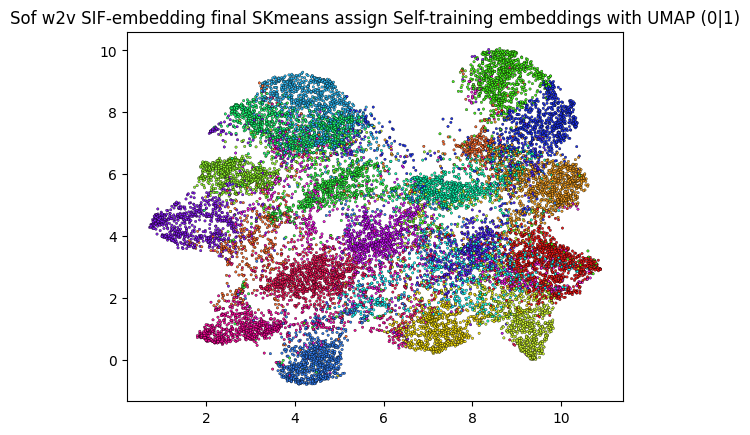

In [36]:
plot.commonSpace_plot(z4.detach().numpy(), comp=[0, 1], tagLabels=y_skm_pred4, 
                      data_name="Sof w2v SIF-embedding final SKmeans assign", dimred = 'UMAP')

### STC-datstackoverflow-wdeWord2Vec-scaNone-tfeSIF-norml2-initSphericalKmeans

In [37]:
stc_weights=join(data_in_dir, 
                 dataset, 
                 "artefacts", 
                 "STC-datstackoverflow-wdeWord2Vec-scaNone-tfeSIF-norml2-initSphericalKmeans.pth")

In [38]:
x, y = load_data(dataset=dataset_dir, word_emb='Word2Vec', transform='SIF', scaler=None, norm='l2')
n_clusters = len(torch.unique(torch.tensor(y)))

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# conversion des données en tenseurs
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

stc = STC(hidden_dims=[torch.Tensor(X_train).shape[-1], 500, 500, 2000, 20], n_clusters=n_clusters)
stc.from_pretrained(stc_weights)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Embedding started...
Word2Vec words embedding loaded...
>>> /home/godwin/Documents/academic/PPD/torchclust/demos/../datasets/stackoverflow/title_StackOverflow.txt <<<<
#### SIF embedding started...
SIF-Embedding 19999 documents with 48-dimensional word vectors...
### SIF embedding completed...
### Embedding completed...
No scaling applied...
l2 normalization completed...


(torch.Size([18000, 48]),
 torch.Size([2000, 48]),
 torch.Size([18000]),
 torch.Size([2000]))

In [47]:
z1 = stc.autoencoder.encoder(X_train)

kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(z1.detach().numpy())
y_km_pred = kmeans.labels_


skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
skmeans.fit(z1.detach().numpy())
y_skm_pred = skmeans.labels_

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iter

In [48]:
print(min(y_km_pred), len(np.unique(y_km_pred)), max(y_km_pred))
print(min(y_skm_pred), len(np.unique(y_skm_pred)), max(y_skm_pred))

0 20 19
0 20 19


In [49]:
eval.allMetrics(y_train.detach().numpy(), y_km_pred)

[0.5634, 0.5082, 0.3895]

In [50]:
eval.allMetrics(y_train.detach().numpy(), y_skm_pred)

[0.4937, 0.4913, 0.3645]

In [43]:
# comprehension list with 5 runs of kmeans, get average and std of metrics
avg_w2v_sif_nl2_ikm = []
tmp = []
for i in range(5):
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(z1.detach().numpy())
    y_km_pred = kmeans.labels_
    tmp.append([round(x, 3) for x in eval.allMetrics(y_train.detach().numpy(), y_km_pred)])

avg_w2v_sif_nl2_ikm = np.array(tmp)
np.round(avg_w2v_sif_nl2_ikm.mean(axis=0), 3) * 100 , avg_w2v_sif_nl2_ikm.std(axis=0)

(array([56.4, 50.8, 39. ]), array([0.0004899, 0.       , 0.0004   ]))

In [44]:
# comprehension list with 5 runs of Sherical kmeans, get average and std of metrics
avg_w2v_sif_nl2_iskm = []
tmp = []
for i in range(5):
    skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
    skmeans.fit(z1.detach().numpy())
    y_skm_pred = skmeans.labels_
    tmp.append([ round(x, 3) for x in eval.allMetrics(y_train.detach().numpy(), y_skm_pred)])

avg_w2v_sif_nl2_iskm = np.array(tmp)
np.round(avg_w2v_sif_nl2_iskm.mean(axis=0), 3) * 100, avg_w2v_sif_nl2_iskm.std(axis=0)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iter

(array([51.4, 49.2, 35.9]), array([0.01859462, 0.00604649, 0.01175755]))

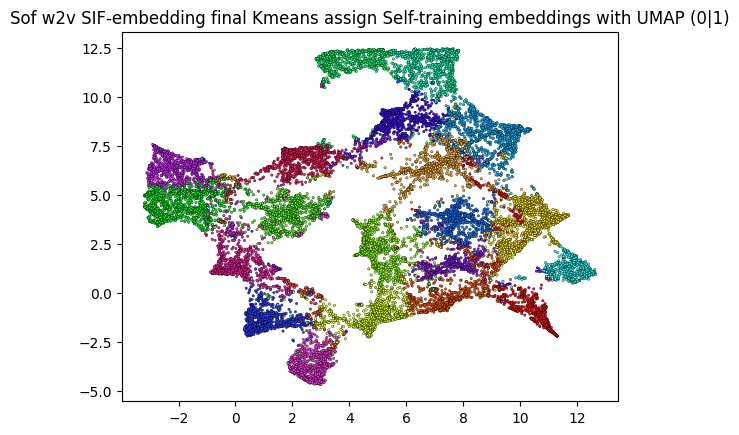

In [45]:
plot.commonSpace_plot(z1.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred, 
                      data_name="Sof w2v SIF-embedding final Kmeans assign", dimred = 'UMAP')

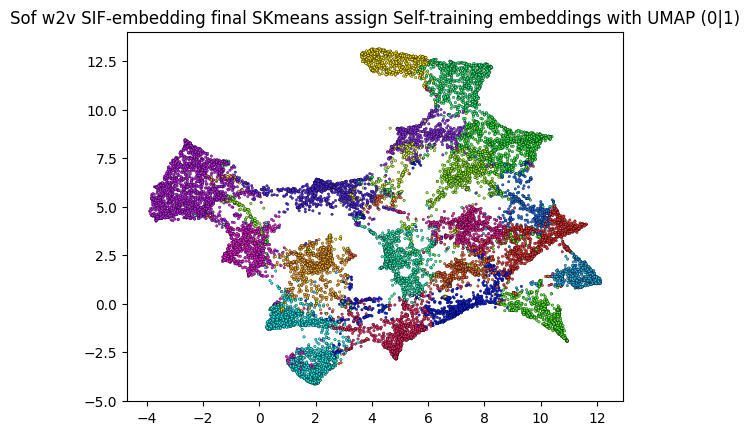

In [51]:
plot.commonSpace_plot(z1.detach().numpy(), comp=[0, 1], tagLabels=y_skm_pred, 
                      data_name="Sof w2v SIF-embedding final SKmeans assign", dimred = 'UMAP')